In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
#pd.set_option('display.max_columns', None)

In [18]:
data = pd.read_csv("./CFB2019.csv")

team_split = data['Team'].str.split("(")
data["Team"] = team_split.str.get(0)
conf = team_split.str.get(1)
conf = conf.str.replace(")", " ")
data["Conference"]=conf.str.strip()

data.set_index("Team", inplace=True)
data.head()




,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,...,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Conference
Team,,,,,,,,,,,,,,,,,,,,,
Air Force,13,11-2,51,881,5483,6.22,55,421.8,17,752,...,78,9,7,16,12,6,18,-2,-0.15,Mountain West
Akron,12,0-12,130,725,2918,4.02,14,243.2,83,871,...,128,6,5,11,12,14,26,-15,-1.25,MAC
Alabama,13,11-2,6,842,6640,7.89,76,510.8,20,877,...,3,11,17,28,4,6,10,18,1.38,SEC
Appalachian St.,14,13-1,39,969,6064,6.26,65,433.1,26,940,...,7,10,14,24,3,6,9,15,1.07,Sun Belt
Arizona,12,4-8,30,873,5281,6.05,42,440.1,120,889,...,89,4,11,15,6,12,18,-3,-0.25,Pac-12


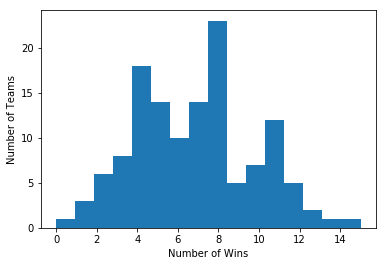

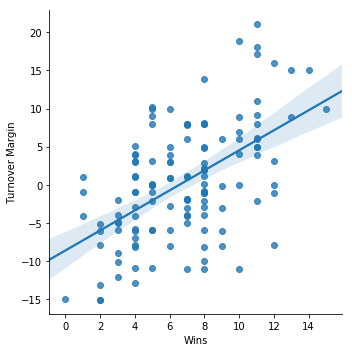

In [28]:
#Split wins and losses to get wins only
wins = data["Win-Loss"].str.split("-")
data['Wins'] = wins.str.get(0)
data['Wins'] = pd.to_numeric(data['Wins'])
data['Games'] = pd.to_numeric(data['Games'])
data['win_perc'] = round(data['Wins']/data['Games'],2)

data.head()
plt.hist(data.Wins, bins=16)
plt.xlabel("Number of Wins")
plt.ylabel("Number of Teams")
sns.lmplot("Wins", "Turnover Margin", data, y_jitter = .15)

/Users/randygatlin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


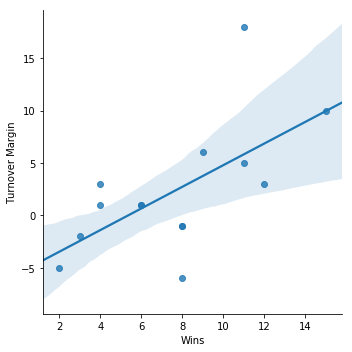

In [21]:
sec = data["Conference"] == "SEC"
SEC_teams = data[sec]
SEC_teams = SEC_teams[['Wins','Turnover Margin']]
sns.lmplot('Wins', 'Turnover Margin', SEC_teams)
#x_data = SEC_teams.sort_values(['Wins'], ascending = [True])
#x_data = SEC_teams['Wins']
#y_data = SEC_teams['Turnover Margin']
#sns.lmplot(x_data, y_data, sec)

#x_data
#plt.figure(figsize=(8, 8))
#plt.scatter(y_data, x_data)
#SEC_teams


In [57]:
SEC_teams = SEC_teams[['win_perc','Average Time of Possession per Game']]
SEC_teams = SEC_teams.sort_values(['Average Time of Possession per Game'], ascending = [False])
SEC_teams


,win_perc,Average Time of Possession per Game
Team,,
Texas A&M,0.62,33:06
Georgia,0.86,32:16
Kentucky,0.62,32:09
Mississippi St.,0.46,31:39
LSU,1.00,30:22
Florida,0.85,30:15
Alabama,0.85,29:59
Missouri,0.50,29:54
Auburn,0.69,29:37
